In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import json
from pprint import pprint

In [155]:
outbreak = pd.read_csv("Cleaned_outbreak_data.csv")
outbreak.drop(["Hospitalizations","Info on Deaths"], axis=1, inplace=True)
outbreak

,Year,Month,State,Primary Mode,Etiology,Etiology Status,Setting,Illnesses,Info on Hospitalizations,Deaths
0,2020,1,Wisconsin,Person-to-person,Norovirus Genogroup II,Confirmed,Other healthcare facility,6,6.0,0.0
1,2020,1,Nebraska,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,20,20.0,0.0
2,2020,1,New York,Food,Clostridium perfringens,Suspected,Caterer (food prepared off-site from where ser...,7,7.0,0.0
3,2020,1,New Mexico,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,18,18.0,0.0
4,2020,1,Minnesota,Person-to-person,Norovirus unknown,Suspected,Long-term care/nursing home/assisted living fa...,95,95.0,2.0
...,...,...,...,...,...,...,...,...,...,...
2604,2021,7,Kansas,Food,Cyclospora cayetanensis,Confirmed,Restaurant - Sit-down dining,9,8.0,0.0
2605,2021,8,Kansas,Food,Salmonella enterica,Confirmed,Restaurant - Sit-down dining,2,2.0,0.0
2606,2021,11,Multistate,Food,Listeria monocytogenes,Confirmed,Unknown,7,7.0,3.0
2607,2021,5,Arizona,Person-to-person,Norovirus Genogroup II,Suspected,Ship/boat,19,19.0,0.0


In [130]:
#number and list of unique settings
setting_count = len(outbreak["Setting"].unique())
print(f"There are {setting_count} settings listed in the dataset in which people became infected.")
setting_list = outbreak["Setting"].unique()
print(f"The settings are: {setting_list}")

There are 11 settings listed in the dataset in which people became infected.
The settings are: ['Other, specify' 'School/college/university'
 'Restaurant - "Fast-food"(drive up service or pay at counter); Restaurant - Sit-down dining; Restaurant - other or unknown type; Private home/residence; Grocery store; Long-term care/nursing home/assisted living facility; Camp; Farm/dairy'
 'Private home/residence; Agricultural feed store' 'Prison/jail'
 'Event space' 'Hospital' 'Grocery store' 'Child day care' 'Unknown'
 'Festival or fair']


In [282]:
#sort illnesses by confirmed or suspected status
etio_status = outbreak.groupby("Etiology Status")["Illnesses"].sum()
etio_status_df = pd.DataFrame(etio_status).sort_values(by="Illnesses",ascending=False)
etio_status_df

,Illnesses
Etiology Status,
Confirmed,26914
Suspected,24426
Confirmed; Confirmed,1401
Confirmed; Suspected,1370
Suspected; Suspected,781
Suspected; Confirmed,319
Confirmed; Suspected; Suspected,119
Confirmed; Confirmed; Suspected,79
Suspected; Suspected; Suspected,58


In [284]:
#drop rows with multiple etiologies
etio_status_df.drop(etio_status_df[etio_status_df.Illnesses < 1458].index, inplace=True)

Text(0.5, 1.0, '% of Confirmed Illnesses vs Suspected')

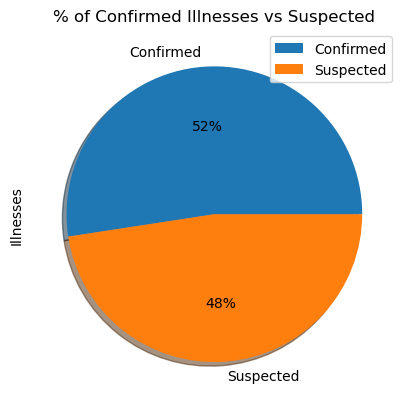

In [286]:
#percent of Illnesses confirmed vs suspected
etio_status_df.groupby(["Etiology Status"]).sum().plot(kind='pie', y='Illnesses',autopct='%1.0f%%',shadow=True)
plt.title("% of Confirmed Illnesses vs Suspected")

In [269]:
#get illnesses per setting
etio_setting = outbreak.groupby("Setting")["Illnesses"].sum()
etio_setting_df = pd.DataFrame(etio_setting).sort_values(by=["Illnesses"],ascending=False)
etio_setting_df.head(7)

,Illnesses
Setting,
Long-term care/nursing home/assisted living facility,25890
Child day care,5882
School/college/university,4588
Private home/residence; Agricultural feed store,2859
Unknown,2242
Restaurant - Sit-down dining,1748
Private home/residence,1458


In [270]:
#narrow down to top 7 settings
etio_setting_df.drop(etio_setting_df[etio_setting_df.Illnesses < 1458].index, inplace=True)

Text(0.5, 1.0, 'Top 7 Settings for Reported Illnesses')

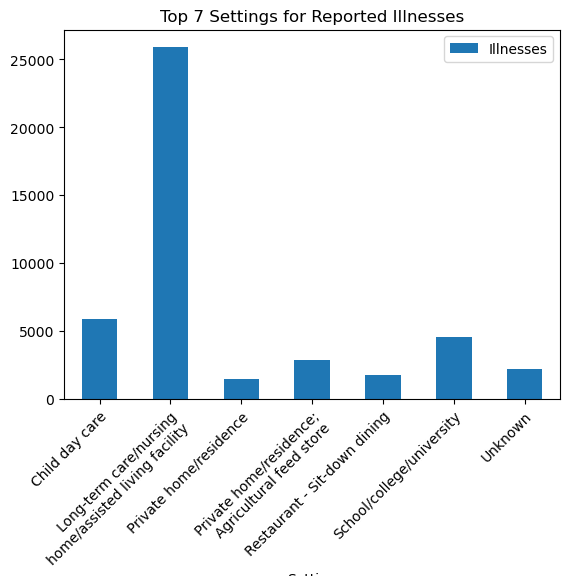

In [271]:
#bar chart of top 7 settings
etio_setting_df.groupby(["Setting"]).sum().plot(kind='bar',y="Illnesses")
plt.xticks(rotation=45,horizontalalignment="right",wrap=True,)
plt.title("Top 7 Settings for Reported Illnesses")

In [164]:
#get top etiologies by mode
etio_mode = outbreak.groupby("Primary Mode")["Illnesses"].sum()
etio_mode_df = pd.DataFrame(etio_mode).sort_values(by=["Illnesses"],ascending=False)
etio_mode_df

,Illnesses
Primary Mode,
Person-to-person,37147
Food,11223
Animal Contact,3703
Indeterminate/Other/Unknown,2829
Water,733
Environmental contamination other than food/water,19


Text(0.5, 1.0, '% of Illnesses by Mode of Infection')

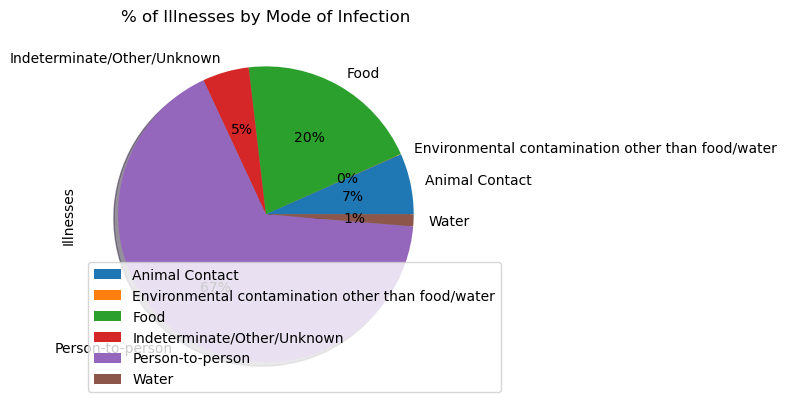

In [248]:
#percent of Illnesses by primary mode
etio_mode_df.groupby(['Primary Mode']).sum().plot(kind='pie', y='Illnesses',autopct='%1.0f%%',shadow=True)
plt.title("% of Illnesses by Mode of Infection")

Text(0.5, 1.0, '# of Reported Illnesses per Mode of Infection')

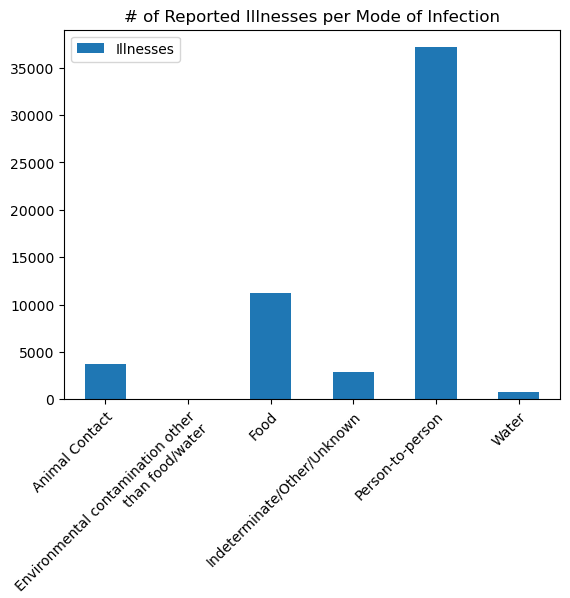

In [249]:
etio_mode_df.groupby(["Primary Mode"]).sum().plot(kind='bar',y="Illnesses")
plt.xticks(rotation=45, horizontalalignment="right",wrap=True,)
plt.title("# of Reported Illnesses per Mode of Infection")

In [288]:
etio_mode = outbreak.groupby(["Primary Mode","Etiology"])["Illnesses"].sum()
etio_mode_df = pd.DataFrame(etio_mode).sort_values(by=["Primary Mode"])
etio_mode_df.head(20)

Illnesses
Primary Mode                                      Etiology                                                     
Animal Contact                                    Campylobacter                                               2
                                                  Salmonella enterica                                      3278
                                                  Giardia unknown                                             2
                                                  Escherichia coli, Shiga toxin-producing; Escher...        205
                                                  Escherichia coli, Shiga toxin-producing                    21
                                                  Cryptosporidium unknown; Escherichia coli, Shig...          3
                                                  Salmonella bongori                                          2
                                                  Cryptosporidium parvum                                     37
                                                  Campylobacter unknown; Campylobacter jejuni                 2
                                                  Campylobacter unknown                                       7
                                                  Campylobacter jejuni                                       35
                                                  Cryptosporidium unknown                                   106
                                                  Campylobacter coli                                          3
Environmental contamination other than food/water Norovirus unknown                                           2
                                                  Salmonella enterica                                         3
                                                  Clostridium                                                14
Food                                              Other - Bacterium                                          29
                                                  Salmonella enterica; Campylobacter jejuni                   5
                                                  Salmonella enterica                                      4929
                                                  Plant/Herbal toxins                                         7

In [289]:
#Etiology per mode greater than 500 reported infections
etio_mode_df.drop(etio_mode_df[etio_mode_df.Illnesses < 200].index, inplace=True)
etio_mode_df.head(20)

Illnesses
Primary Mode                Etiology                                                     
Animal Contact              Salmonella enterica                                      3278
                            Escherichia coli, Shiga toxin-producing; Escher...        205
Food                        Salmonella enterica                                      4929
                            Norovirus Genogroup II                                   1024
                            Norovirus unknown                                         622
                            Norovirus Genogroup II; Norovirus Genogroup II            244
                            Salmonella unknown                                        241
                            Norovirus                                                 211
                            Bacillus cereus                                           544
                            Clostridium perfringens                                   486
                            Escherichia coli, Shiga toxin-producing                   507
                            Cyclospora cayetanensis                                   333
Indeterminate/Other/Unknown Norovirus unknown                                         807
                            Norovirus Genogroup II                                    453
                            Norovirus                                                 669
Person-to-person            Norovirus unknown; Clostridium difficile                  475
                            Norovirus unknown                                       15993
                            Norovirus Genogroup II; Norovirus unknown                 432
                            Norovirus Genogroup II; Norovirus Genogroup II            730
                            Norovirus Genogroup IX                                    274